In [36]:
import read_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import unique
from sklearn.mixture import GaussianMixture

In [37]:
dataframe = read_data.create_frame()
dataframe

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
...,...,...,...,...,...,...,...
250,MUNSA-0007688,MUNSA-0007688,1,8,0,"[B.24.10, B.27.25.B.30, A.36, B.24.28, B.24.11...",[9]
251,MUNSA-0007686,MUNSA-0007686,1,10,0,"[A.37, B.29.25, A.37, B.29.25, A.37, B.29.25, ...",[0]
252,HMV-63.54.12,HMV-63.54.12inf,1,16,0,"[E.31.47, B.29.25, A.19, B.31.25, E.31.47, B.2...",[0]
253,HMV-63.54.12,HMV-63.54.12cent,1,16,0,"[B.29.25, A.19, B.31.25, A.17, B.29.25, A.19, ...",[0]


In [3]:
sequences = dataframe['sequence_values']
names = dataframe['seq_name']
list_s = sequences.tolist()
sentences = [' '.join(string_list) for string_list in list_s]
print(sentences)
print(type(sentences))
print(type(sentences[0]))

['B.27.23.B.30 A.38 G.27.30 B.24.11 B.27.28.30.B.30 A.4 H.24.28 B.24.12', 'E.17.48.3 B.29.23.B.25', 'B.29.35 B.24.5', 'B.24.11 B.29.35', 'B.24.11 B.31.28 A.6 B.24.28.7 A.38 B.29.30.10 E.31.20 B.27.30', 'B.24.28.30 C.24.1 G.29.30.52 A.36 B.27.23 B.24.11 B.29.23 E.17', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23', 'A.1.16 C.29 A.36 B.24.28 A.6 G.29.52 B.24.11 B.27.30 A.38 B.29.23.B.30', 'B.29.25 B.24.25', 'B.31.21 B.27.30 B.31.21 B.27.30', 'B.24.11 A.36 B.24.11 A.36', 'B.24.28.10 E.17.3 B.29.34', 'E.17.48 B.29.23', 'E.17.3 B.29.35', 'B.24.11 B.29.23.B.25', 'B.29.25 E.17.3', 'A.1 B.24.11 B.27.30 B.29.30 B.24.10.7 A.36 A.6 H.24.28', 'E.17.48.3 B.29.25', 'B.29.25 E.17', 'A.17.3 B.29.25', 'B.29.25 E.17.48.3', 'B.29.25 E.17.3', 'B.24.25.B.11 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'A.36.3 B.29.25', 'B.29.35.B.25 E.17', 'E.17.3 B.29.23.25.B.25', 'E.17 B.29.23.B.25', 'E.17.48.3 B.29.23.B.25', 'B.29.23.B.25 E.17', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29.23.B.25', 'E.17.3 B.29

In [4]:
def custom_tokenizer(text):
    return text.split()

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(sentences)
print(X[1])
feature_names = vectorizer.get_feature_names_out()

print("Counts features in vectorizer:", len(feature_names))
print(type(X))
print(type(X[0]))
print(X[0])
sentence_vectors = X.toarray()

  (0, 90)	0.5414024512506003
  (0, 143)	0.8407635730571595
Counts features in vectorizer: 170
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 51)	0.35622765289267644
  (0, 160)	0.3090880851097673
  (0, 39)	0.3260999722721223
  (0, 77)	0.47945667059234665
  (0, 48)	0.17520381836696658
  (0, 152)	0.44623692598960807
  (0, 37)	0.21907881201283566
  (0, 75)	0.40438499738046635


/home/zuzaw/mini_hackathon/Bootcamp-mini-hackathon-2024/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
n_clusters = 4
gaussian_model = GaussianMixture(n_components=n_clusters)

gaussian_model.fit(sentence_vectors)

gaussian_result = gaussian_model.predict(sentence_vectors)

gaussian_clusters = unique(gaussian_result)

print(gaussian_clusters)
print(gaussian_result)

[0 1 2 3]
[2 1 3 3 0 0 0 0 3 0 0 3 3 3 1 3 0 3 3 3 3 3 1 1 3 3 3 1 1 1 1 1 1 1 3 3 1
 3 3 3 3 3 1 0 0 2 0 2 2 2 3 2 2 2 0 3 0 3 0 2 3 3 0 2 0 0 0 0 0 2 0 2 3 2
 0 3 0 1 0 0 1 3 3 0 0 0 2 3 3 3 3 0 3 3 0 2 3 3 1 3 3 1 1 3 1 3 3 2 1 1 3
 1 3 3 3 3 1 3 3 1 3 1 1 1 3 3 2 0 3 3 3 2 1 1 0 2 1 3 3 1 3 3 1 0 0 3 2 3
 3 3 2 3 3 3 3 0 3 2 2 2 3 2 2 2 3 2 2 3 0 2 3 3 1 3 1 0 0 0 0 3 3 2 3 1 0
 2 0 3 3 2 0 0 2 3 2 0 0 0 0 0 3 3 2 2 2 2 0 0 2 2 3 3 2 2 2 2 2 2 3 2 3 3
 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 3 0 3 3 3 2]


Obserwacje z clusteringu
W klustrze 0 - każda sekwencja zawiera znak 'B.29.23.B.25' mają 2 znaki
w klustrze 1
W klustrze 2 - często pojawiają się 'B.29.X' {35, 25, 34, 23, 23.25.B.25, 115} cztery razy 'B.24.11' dwa razy B.31.28.30'
w klustrze 3 - 'A.X' {6, 36, 38}

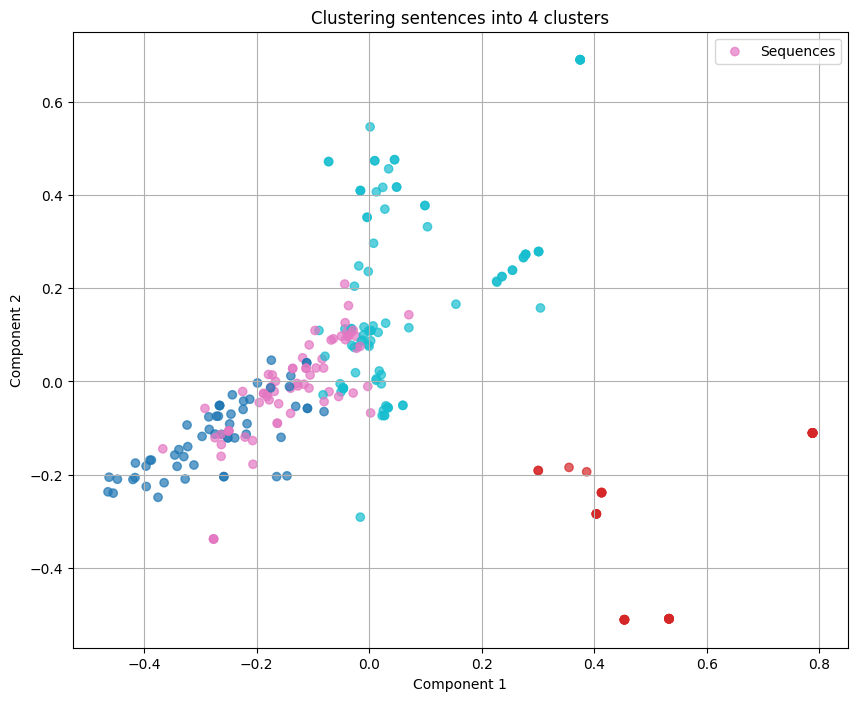

In [14]:

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(sentence_vectors)

colors = np.arange(n_clusters) % 10

plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=gaussian_result, cmap='tab10', alpha=0.7, label='Sequences')
plt.legend()

plt.title(f'Clustering sentences into {n_clusters} clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.savefig('name.png')
plt.show()


In [30]:
output = zip(sentence_vectors, gaussian_result)

vectors_by_clusters = [[] for _ in range(n_clusters)]
names_by_clusters = [[] for _ in range(n_clusters)]
seq_values_by_clusters = [[] for _ in range(n_clusters)]

for i in range(len(sentence_vectors)):
    cluster_id = gaussian_result[i]
    vectors_by_clusters[cluster_id].append(sentence_vectors[i])
    names_by_clusters[cluster_id].append(names[i])
    seq_values_by_clusters[cluster_id].append(sequences[i])

count_sign_by_clusters = []
for num in range(n_clusters):
    count_sign_by_clusters.append({})
    for sentence in seq_values_by_clusters[num]:
        for sign in sentence:
            if sign in count_sign_by_clusters[num]:
                count_sign_by_clusters[num][sign]+=1
            else:
                count_sign_by_clusters[num][sign] = 1

sorted_dicts = []
for num in range(n_clusters):
    print(f"Kluster {num} posiada aż {len(vectors_by_clusters[num])} sekwencji")
    sorted_dict = dict(sorted(count_sign_by_clusters[num].items(), key=lambda item: item[1], reverse=True))
    sorted_dicts.append(sorted_dict)
    print(sorted_dict)


Kluster 0 posiada aż 58 sekwencji
{'B.24.11': 48, 'B.27.30': 46, 'A.6': 35, 'A.36': 33, 'G.29.52': 22, 'A.38': 20, 'B.31.21': 17, 'B.31.28': 16, 'B.29.23': 15, 'G.29.30.52': 14, 'B.24.28': 13, 'A.1.16': 11, 'B.29.30': 11, 'E.17': 8, 'B.29.23.B.30': 8, 'A.4': 7, 'C.24.1': 6, 'C.29': 5, 'A.12': 5, 'B.24.28.10': 5, 'B.24.11.7': 5, 'H.24.28': 4, 'A.13': 4, 'B.29.30.10': 3, 'B.27.23': 3, 'H.31.22': 3, 'A.44': 3, 'A.19.13': 3, 'C.27': 3, 'K.103.53': 3, 'B.24.28.7': 2, 'A.1': 2, 'E.31.14.47': 2, 'C.24': 2, 'B.27.23.B.30': 2, 'B.24.5': 2, 'E.31.28.47': 2, 'A.18': 2, 'E.31.20': 1, 'B.24.28.30': 1, 'B.24.10.7': 1, 'B.27.23.B.25': 1, 'G.27': 1, 'A.11': 1, 'B.29.35': 1, 'B.29.23.10': 1, 'B.31.28.30': 1, 'B.27.23.23': 1, 'B.29.25': 1, 'B.27.30.B.23': 1, '0': 1, 'B.31.12': 1, 'B.31.11': 1, 'B.24.28.30.7': 1, 'G.H.29.52': 1, 'B.31.21.R': 1, 'A.243': 1, 'B.29.25.B.30': 1, 'B.24.10': 1, 'B.27.25.B.30': 1}
Kluster 1 posiada aż 35 sekwencji
{'B.29.23.B.25': 35, 'E.17.3': 10, 'E.17': 7, 'B.24.11': 6, 'E.1


W klustrze 1 - znak 'B.29.23.B.25' występuję 35 razy a znaki zaczynającę się od E.17 25 czyli w każdej występuje ten sam znak i nie występuje w żadnym innym


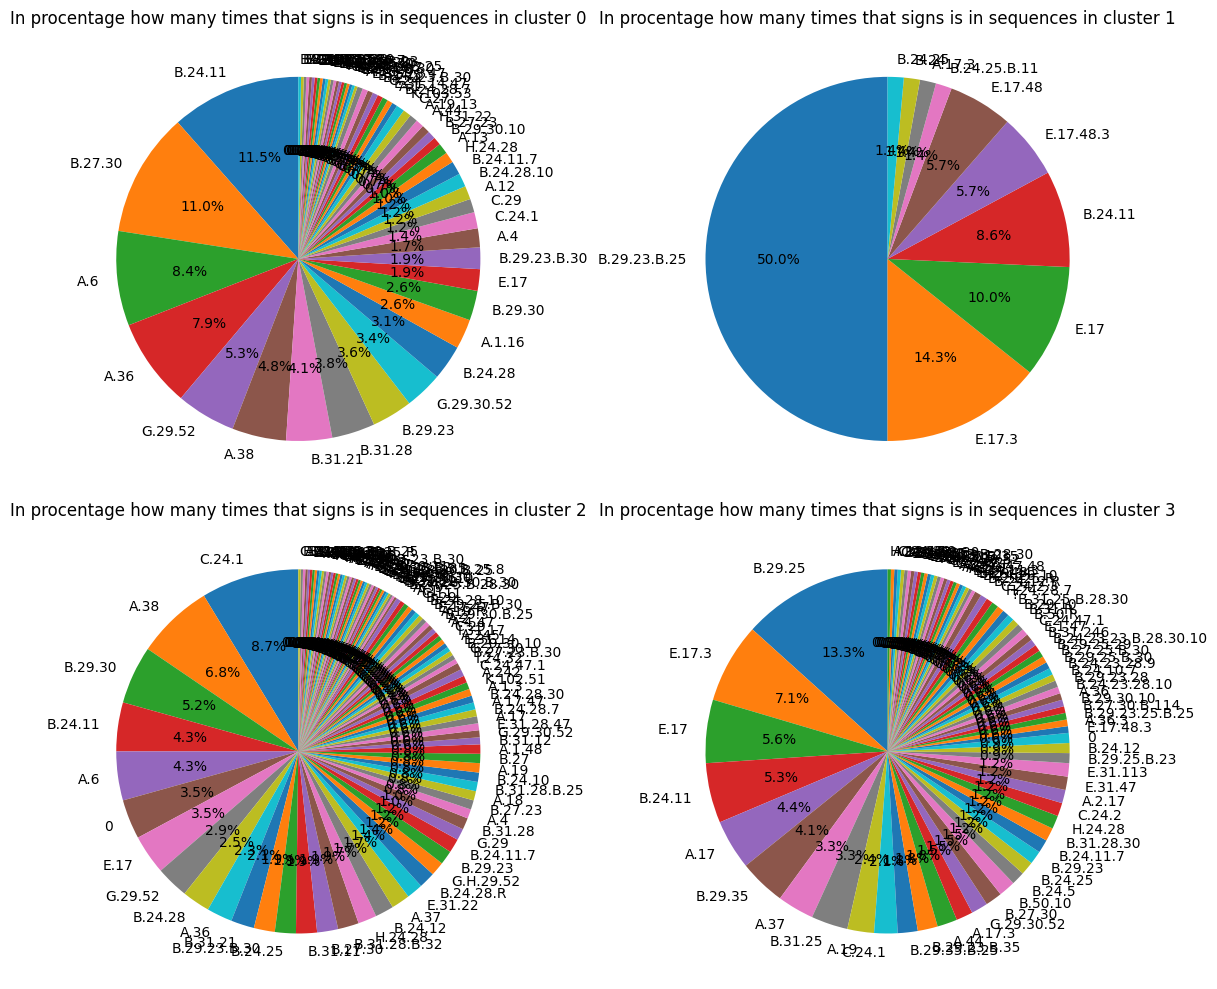

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].pie(sorted_dicts[0].values(), labels=sorted_dicts[0].keys(), autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('In procentage how many times that signs is in sequences in cluster 0')

axs[0, 1].pie(sorted_dicts[1].values(), labels=sorted_dicts[1].keys(), autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('In procentage how many times that signs is in sequences in cluster 1')

axs[1, 0].pie(sorted_dicts[2].values(), labels=sorted_dicts[2].keys(), autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('In procentage how many times that signs is in sequences in cluster 2')

axs[1, 1].pie(sorted_dicts[3].values(), labels=sorted_dicts[3].keys(), autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('In procentage how many times that signs is in sequences in cluster 3')

plt.tight_layout()
plt.show()
